In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.columns = df.columns.str.replace(' ', '_')

In [3]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

In [5]:
daily_sales = (
    df.groupby(df['Date'].dt.date)['Total_Amount']
    .sum()
    .reset_index()
)

daily_sales.columns = ['Date', 'Total_Amount']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
daily_sales.head()


,Date,Total_Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100


In [6]:
import matplotlib.pyplot as plt

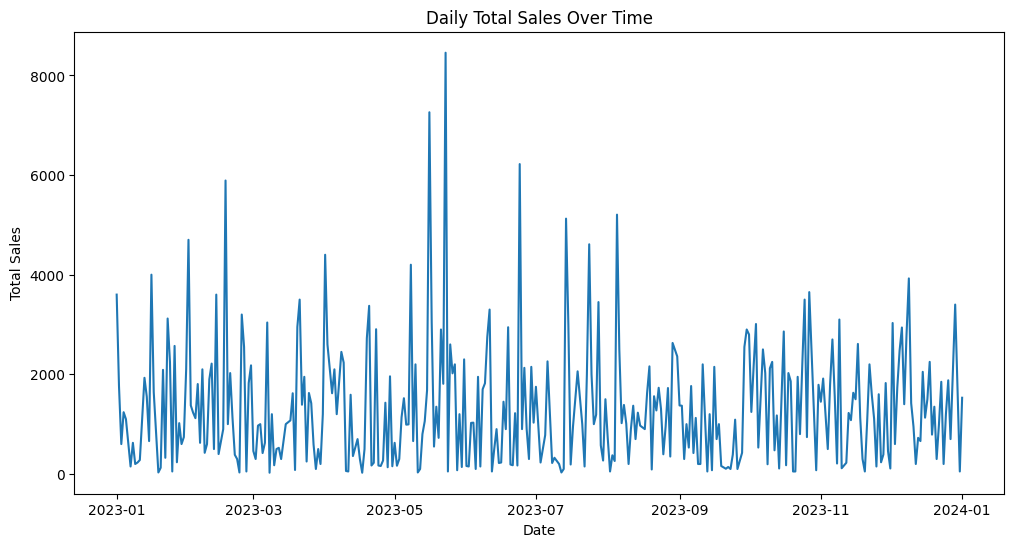

In [7]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'], daily_sales['Total_Amount'])
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


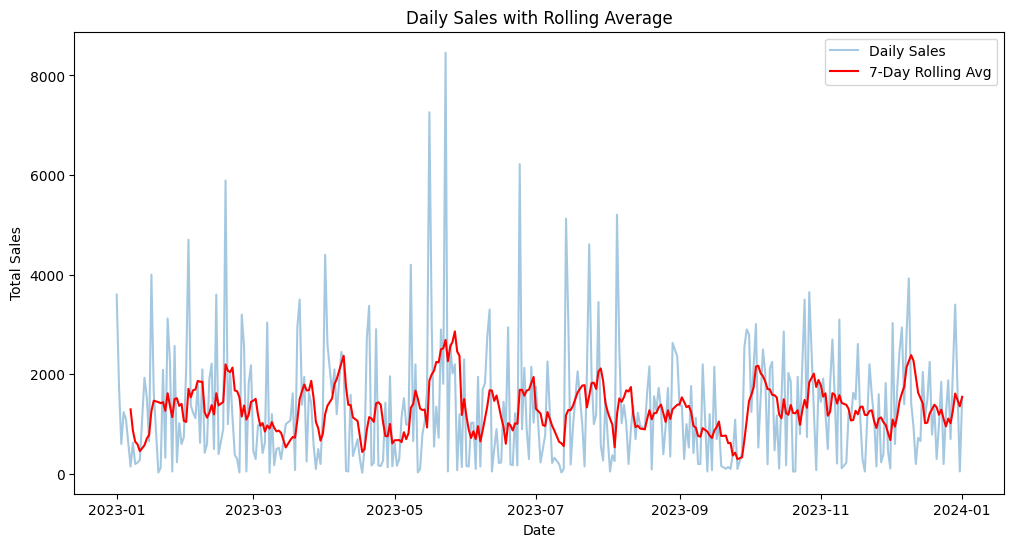

In [8]:
daily_sales['Rolling_7'] = daily_sales['Total_Amount'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'], daily_sales['Total_Amount'], alpha=0.4, label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['Rolling_7'], color='red', label='7-Day Rolling Avg')
plt.title("Daily Sales with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


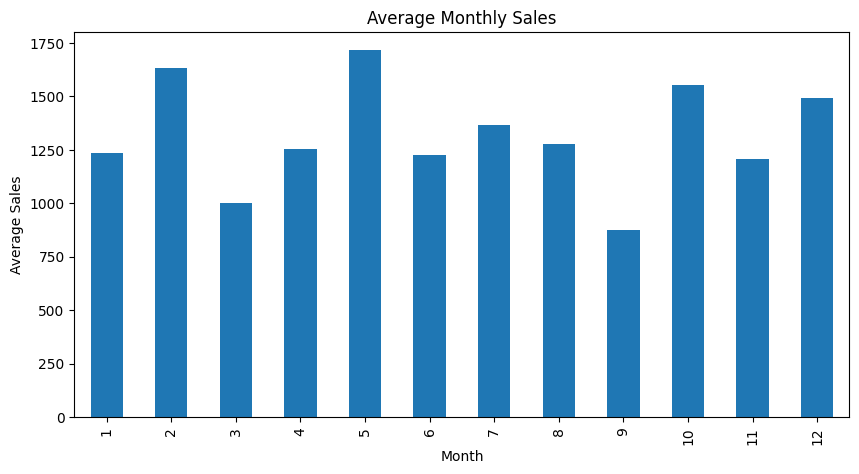

In [9]:
daily_sales['Month'] = daily_sales['Date'].dt.month

monthly_sales = daily_sales.groupby('Month')['Total_Amount'].mean()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


In [10]:
daily_sales = daily_sales.set_index('Date')


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decomposition = seasonal_decompose(
    daily_sales['Total_Amount'],
    model='additive',
    period=7
)


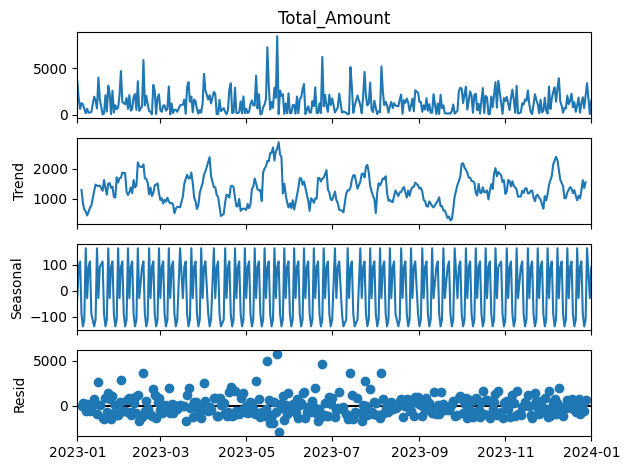

In [14]:
decomposition.plot()
plt.show()


The trend component confirms a gradual upward movement, validating the presence of long-term growth.

The seasonal component shows consistent repeating patterns, indicating stable weekly seasonality in sales behavior.


Residuals appear largely random, suggesting that trend and seasonality explain most of the variation. Occasional spikes may indicate unusual sales events

## Time Series Decomposition

The time series was decomposed into trend, seasonal, and residual components. The trend reveals the underlying long-term direction of sales, while the seasonal component highlights recurring patterns. Residuals capture random fluctuations and potential anomalies not explained by trend or seasonality.

## Train–Test Split


In [15]:
train_size = int(len(daily_sales) * 0.8)

train = daily_sales.iloc[:train_size]
test = daily_sales.iloc[train_size:]


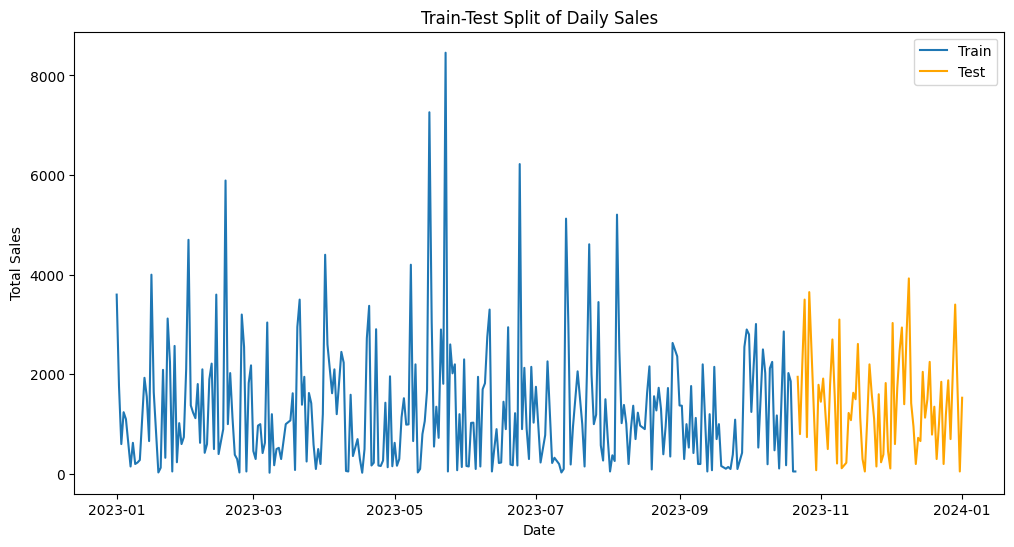

In [16]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Total_Amount'], label='Train')
plt.plot(test.index, test['Total_Amount'], label='Test', color='orange')
plt.title("Train-Test Split of Daily Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()
    

## Train–Test Split

The dataset was split into training and testing sets using an 80/20 time-based split to preserve temporal order. The training set contains historical sales data used to fit forecasting models, while the test set represents unseen future data for evaluating model performance.